In [1]:
pip install regions

Note: you may need to restart the kernel to use updated packages.


Importing the necessary tools:

In [2]:
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from regions import PixCoord
from regions import CircleSkyRegion
from regions import EllipseSkyRegion, EllipsePixelRegion
from regions import CircleSkyRegion, CirclePixelRegion
from regions import RectangleSkyRegion, RectanglePixelRegion

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from astropy.table import Table
from regions import make_example_dataset

In [4]:
style_revisions = {
 'axes.linewidth':  1.5, 
 'xtick.top' : True,         
 'ytick.right' :  True,
 'xtick.direction' : 'in',    
 'ytick.direction' : 'in', 
 'xtick.major.size' : 11,     
 'ytick.major.size' : 11,
 'xtick.minor.size' : 5.5,    
 'ytick.minor.size' : 5.5,      
 'font.size' : 16,              
 'figure.figsize' : [7, 9], 
 'lines.linewidth' : 2.      
}

Importing our WR star locations using pandas:

In [5]:
table = pd.read_table('table5.dat', header=0, delimiter='\s+')

In [6]:
table2 = pd.read_table('table7.dat', header=0, delimiter='\s+')

In [7]:
x = table2['Type']
tableWR = table.join(x)
tableWR

,Num,Star,RA,Dec,Type
0,1,J013232.07+303522.4,23.13362,30.58956,WN2
1,2,J013232.13+303514.3,23.13387,30.58731,WN3+neb
2,3,J013233.24+302652.3,23.13850,30.44786,WN2+abs
3,4,J013237.62+304004.3,23.15675,30.66786,WC
4,5,J013237.72+304005.7,23.15717,30.66825,Ofpe/WN9
...,...,...,...,...,...
201,202,J013458.89+304129.0,23.74537,30.69139,WC4
202,203,J013505.37+304114.9,23.77237,30.68747,WC4-5
203,204,J013507.24+304500.9,23.78017,30.75025,WC5
204,205,J013509.73+304157.3,23.79054,30.69925,Ofpe/WN9


In [8]:
table.min()

Num                       1
Star    J013232.07+303522.4
RA                  23.1336
Dec                 30.1886
dtype: object

In [9]:
table.max()

Num                     206
Star    J013510.27+304522.9
RA                  23.7928
Dec                 31.1302
dtype: object

In [10]:
Dec= table['Dec']
RA = table['RA']

Plotting our WR stars:

Text(0.5, 1.0, 'Table 5 Data')

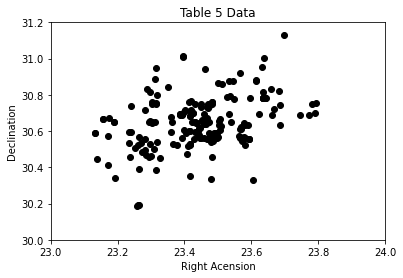

In [11]:
fig, ax = plt.subplots()

plt.plot(table.RA, table.Dec, 'ko')
ax.set_xlim(23,24)   
ax.set_ylim(30,31.2)   
ax.set_xlabel('Right Acension')
ax.set_ylabel('Declination')
ax.set_title('Table 5 Data')

Now lets use astropy to plot our atomic gas map of M33:

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


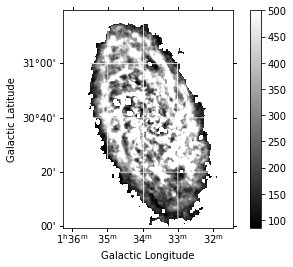

In [12]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename


filename = get_pkg_data_filename('atomic.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data,cmap='gray', vmin=85, vmax=500, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.colorbar()

Lets make a histogram of the atomic gas map data to see where our v min and v max should be:

Text(0.5, 1.0, 'Atomic Map')

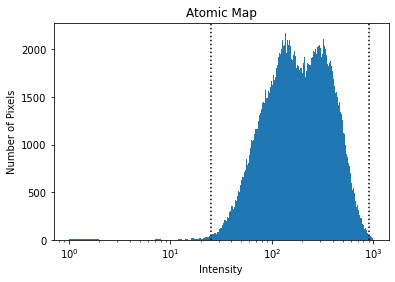

In [13]:
plt.hist(hdu.data.flatten(),bins=range(0,1000,1))
plt.axvline(25, ls='dotted',color='black',zorder=2)
plt.axvline(900, ls='dotted',color='black',zorder=2)
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.title('Atomic Map')

In [181]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1256                                                  
NAXIS2  =                 1604                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'M33_1   '                                                            
BUNIT   = 'Jy beam-1 m s-1'    / Brightness (pixel) unit                        
ALTRVAL =   1.420751695384E+09 /Alternate frequency reference value             
ALTRPIX =   1.000000000000E+00 /Alternate frequency reference pixel             
VELREF  =                  257 /1 LSR, 2 HEL, 3 OBS, +256 Radio                 
COMMENT casacore non-standard usage: 4 LSD, 5 GEO, 6 SOU, 7 GAL                 
TELESCOP= 'EVLA    '        

There are two peaks! Interesting!

Creating the overlay of WR stars on the atomic gas map of M33:

In [15]:
tableWR

,Num,Star,RA,Dec,Type
0,1,J013232.07+303522.4,23.13362,30.58956,WN2
1,2,J013232.13+303514.3,23.13387,30.58731,WN3+neb
2,3,J013233.24+302652.3,23.13850,30.44786,WN2+abs
3,4,J013237.62+304004.3,23.15675,30.66786,WC
4,5,J013237.72+304005.7,23.15717,30.66825,Ofpe/WN9
...,...,...,...,...,...
201,202,J013458.89+304129.0,23.74537,30.69139,WC4
202,203,J013505.37+304114.9,23.77237,30.68747,WC4-5
203,204,J013507.24+304500.9,23.78017,30.75025,WC5
204,205,J013509.73+304157.3,23.79054,30.69925,Ofpe/WN9


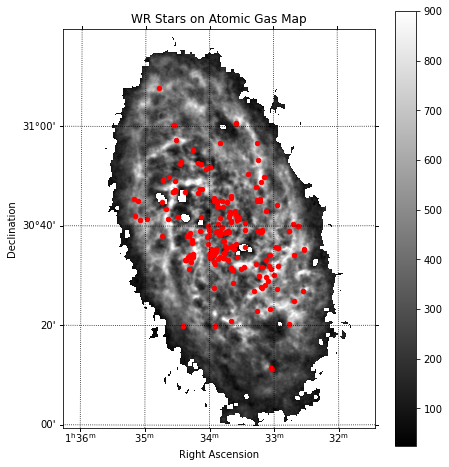

In [16]:
fig = plt.figure(figsize = (7, 8))
ax = plt.subplot(projection=wcs, label='overlays')

plt.imshow(hdu.data, cmap='gray', vmin=25, vmax=900)
plt.colorbar()
plt.title('WR Stars on Atomic Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')

#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
ax.scatter(RA, Dec, transform=ax.get_transform('fk5'), s=20,edgecolor='red', facecolor='red', cmap='gray')



Now for the CO Emission Map:

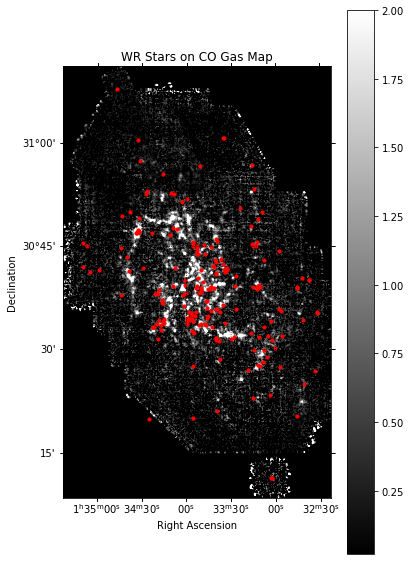

In [17]:
filename2 = get_pkg_data_filename('ico.fits')

hdu2 = fits.open(filename2)[0]
wcs2 = WCS(hdu2.header, naxis=2)

fig = plt.figure(figsize = (6,10))
ax = plt.subplot(projection=wcs2, label='overlays')
plt.imshow(hdu2.data[0,0], cmap='gray', vmin=.02, vmax=2)
plt.colorbar()
plt.title('WR Stars on CO Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
ax.scatter(RA, Dec, transform=ax.get_transform('fk5'), s=10, edgecolor='red', facecolor='red', cmap='gray')

Text(0.5, 1.0, 'CO Map')

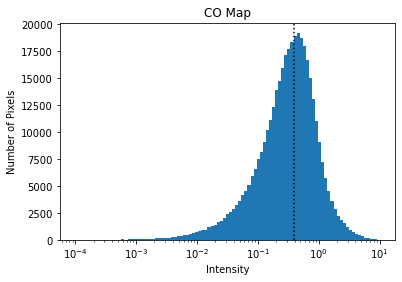

In [18]:
plt.hist(hdu2.data.flatten(),bins=np.logspace(-4,1,100))
plt.axvline(0.387, ls='dotted',color='black',zorder=2)
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.title('CO Map')

In [19]:
hdu2.header

SIMPLE  =                    T         /                                        
BITPIX  =                  -32         /                                        
NAXIS   =                    4         /                                        
NAXIS1  =                  777         /                                        
NAXIS2  =                 1251         /                                        
NAXIS3  =                    1         /                                        
NAXIS4  =                    1         /                                        
DATAMIN = -0.3150268745422E+02         /                                        
DATAMAX =  0.1603829193115E+02         /                                        
BUNIT   = 'K (Ta*)     '               /                                        
CTYPE1  = 'RA---GLS    '               /                                        
CRVAL1  =  0.2346208333333E+02         /                                        
CDELT1  = -0.8333333129820E-

## Red Supergiant Stars on Atomic Gas Map 

In [20]:
table3 = pd.read_csv('asu.tsv',sep='\t')

In [21]:
table3

,RAJ2000,DEJ2000
0,01 29 49.93,+31 19 24.2
1,01 29 50.82,+30 45 10.5
2,01 29 51.21,+30 46 33.4
3,01 29 52.09,+31 07 14.3
4,01 29 52.11,+31 24 25.6
...,...,...
7083,01 37 56.07,+30 27 44.8
7084,01 37 57.10,+30 04 59.2
7085,01 37 57.15,+31 23 04.9
7086,01 37 57.17,+31 12 53.8


In [22]:
RA2 = table3['RAJ2000']
Dec2 = table3['DEJ2000']

In [23]:
 from astropy.coordinates import SkyCoord

In [24]:
c = SkyCoord(RA2,Dec2, unit=('hourangle','deg'))
c.ra.deg
c.dec.deg

array([31.32338889, 30.75291667, 30.77594444, ..., 31.38469444,
       31.21494444, 30.76902778])

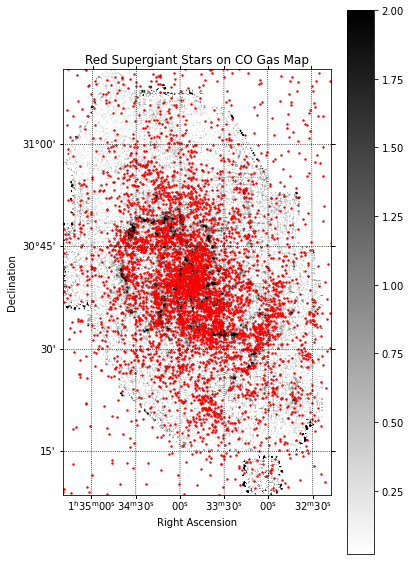

In [174]:
filename3 = get_pkg_data_filename('ico.fits')

hdu3 = fits.open(filename3)[0]
wcs3 = WCS(hdu3.header, naxis=2)

fig = plt.figure(figsize = (6,10))
ax = plt.subplot(projection=wcs2, label='overlays')
plt.imshow(hdu3.data[0,0], cmap='gist_gray_r', vmin=0.02, vmax=2)
plt.colorbar()
plt.title('Red Supergiant Stars on CO Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
ax.scatter(c.ra.deg, c.dec.deg, transform=ax.get_transform('fk5'), s=2, edgecolor='red', facecolor='red', cmap='gray')
ax.set_xlim(15,800)
ax.set_ylim(0,1251)

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import EllipseAnnulusSkyRegion, EllipseAnnulusPixelRegion



In [26]:
hdu3.data.shape

(1, 1, 1251, 777)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(0.0, 1256.0)

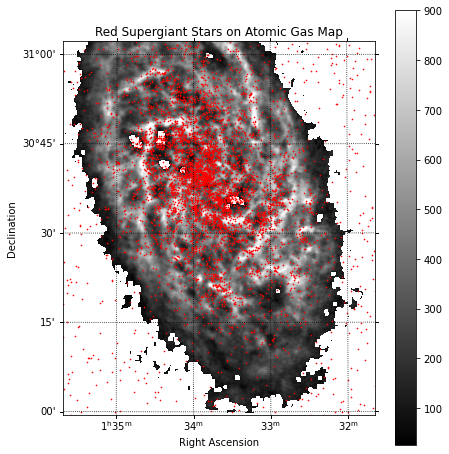

In [27]:

filename4 = get_pkg_data_filename('atomic.fits')

hdu4 = fits.open(filename4)[0]
wcs4 = WCS(hdu4.header)

fig = plt.figure(figsize = (7, 8))
ax = plt.subplot(projection=wcs4, label='overlays')

plt.imshow(hdu4.data, cmap='gray', vmin=25, vmax=900)
plt.colorbar()
plt.title('Red Supergiant Stars on Atomic Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')

#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
ax.scatter(c.ra.deg, c.dec.deg, transform=ax.get_transform('fk5'), s=.4,edgecolor='red', facecolor='red', cmap='gray')

from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion

center = SkyCoord(42, 43, unit='deg')
radius = Angle(3, 'deg')
region = CircleSkyRegion(center, radius)

ax.set_xlim(150,1200)
ax.set_ylim(0,1256)

#### WR and RSGs together

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


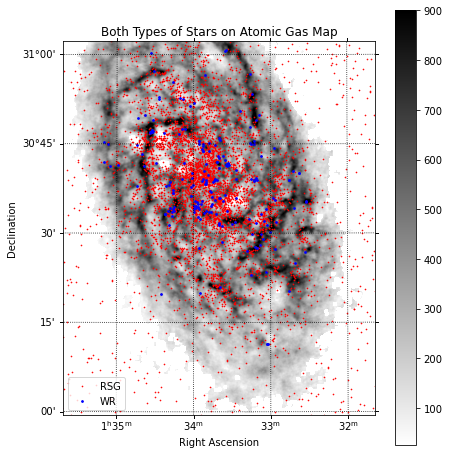

In [28]:
filename5 = get_pkg_data_filename('atomic.fits')

hdu5 = fits.open(filename5)[0]
wcs5 = WCS(hdu5.header)

fig = plt.figure(figsize = (7, 8))
ax = plt.subplot(projection=wcs5, label='overlays')

plt.imshow(hdu5.data, cmap='gray_r', vmin=25, vmax=900)
plt.colorbar()
plt.title('Both Types of Stars on Atomic Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')

#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
ax.scatter(c.ra.deg, c.dec.deg, transform=ax.get_transform('fk5'), s=.4,edgecolor='red', facecolor='red', cmap='gray')
ax.scatter(RA, Dec, transform=ax.get_transform('fk5'), s=3,edgecolor='blue', facecolor='blue', cmap='gray')
ax.set_xlim(150,1200)
ax.set_ylim(0,1256)

location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["RSG", "WR"], loc=0, frameon=legend_drawn_flag)


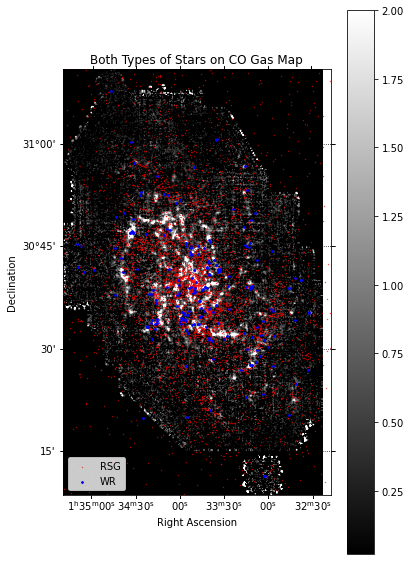

In [29]:
filename6 = get_pkg_data_filename('ico.fits')

hdu6 = fits.open(filename6)[0]
wcs6 = WCS(hdu6.header, naxis=2)

fig = plt.figure(figsize = (6,10))
ax = plt.subplot(projection=wcs6, label='overlays')
plt.imshow(hdu6.data[0,0], cmap='gray', vmin=0.02, vmax=2)
plt.colorbar()
plt.title('Both Types of Stars on CO Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
ax.scatter(c.ra.deg, c.dec.deg, transform=ax.get_transform('fk5'), s=.1, edgecolor='red', facecolor='red', cmap='gray')
ax.scatter(RA, Dec, transform=ax.get_transform('fk5'), s=3,edgecolor='blue', facecolor='blue', cmap='gray')
ax.set_xlim(15,800)
ax.set_ylim(0,1251)
location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["RSG", "WR"], loc=0, frameon=legend_drawn_flag)

## Intensity Histograms

In [30]:
fn = get_pkg_data_filename('atomic.fits')
f = fits.open(fn)
w = WCS(f[0].header)
sky = SkyCoord(RA, Dec , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i = np.asarray(x, dtype='int')
j = np.asarray(y, dtype='int')

[968.30826404 968.0578888  963.7549935  944.16018101 943.72540691
 931.18722496 928.24381672 925.52283921 910.70991389 909.29875381
 909.7574516  865.83109256 863.79197636 862.01125731 859.27255748
 857.19230085 847.42335264 839.13602989 836.74601875 836.28144361
 835.2019054  834.32114619 832.53445626 826.76891475 823.90391984
 815.56311121 815.10070783 814.69244966 811.46968691 808.30148143
 801.75430182 801.96972201 800.07373344 799.60197954 798.44812144
 796.98846666 795.76044026 794.45104974 794.01162677 793.5270493
 792.07762795 786.51470063 784.93191761 783.34448934 781.9382777
 782.00139218 780.90234984 779.4358278  778.17380837 777.2298528
 768.66662314 744.31141375 733.59338138 733.20701716 730.69481262
 728.6623574  717.47383384 707.51881201 706.74066742 706.10310931
 704.63921654 703.86448361 702.7499007  702.49285496 701.50481091
 700.55111028 700.5101238  700.56519161 700.33599587 697.44481352
 696.16024567 695.3423812  694.29391837 690.17607613 687.37418241
 685.41648511

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [31]:
hdu4.data.shape

(1604, 1256)

In [32]:
filterout = [] # which indeces to filter out
for idx in range(len(i)):
    filterout.append(i[idx] > hdu.data.shape[0] or j[idx] > hdu.data.shape[1])
print(filterout)
new_i = []
new_j = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i.append(i[idx])
        new_j.append(j[idx])
    else: pass
i = np.array(new_i)
j = np.array(new_j)
print(i)
print(j)
print(len(i) == len(j))
    # j = np.array(list(filter(lambda x: x <= 1256, j)))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [171]:
p = hdu.data[i,j] #WRs on atomic gas
print(p, p.min())

[ 314.43110891  308.95344572  365.41589924  439.86529888  438.41262418
           nan  326.63304067  645.19394922  804.07982364  786.75672913
           nan  260.91056764  418.23551228  206.12547255  521.98299619
  341.65667051  401.5534368            nan  354.40541496           nan
           nan  593.23694431  273.36786403  329.93868677  617.41667576
  573.69619007  450.78515552  392.72346104  239.61641584           nan
  579.30590274  317.7156686   564.69374404  485.9922745   211.9901038
  295.50924438  500.13180324  264.94737847  304.1886433   601.99917195
  580.68102805  416.70505945           nan  469.93144205  620.17900075
  369.91539971  607.86083865           nan  506.46805776  207.03669398
  587.26862791           nan           nan  506.32866825  478.15671079
  516.80667158           nan  842.30471415  766.79965862  831.20629595
  798.18883761  812.74722452  801.279925    747.81309885  555.15596925
  794.85707006  794.85707006  434.91671326  738.11077135           nan
       

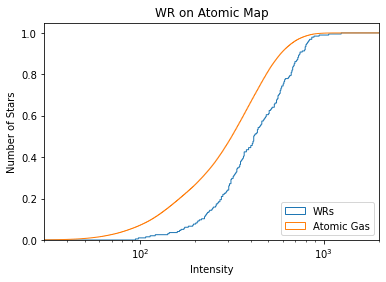

In [34]:
plt.hist(p ,bins=np.logspace(0,4,1000), zorder=2, cumulative=True, density=True, histtype='step', label='WRs')
plt.hist(hdu.data.flatten(), bins=np.logspace(0,4,1000), cumulative=True, density=True, histtype='step', label='Atomic Gas')
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('WR on Atomic Map')
plt.xlim(30,2000)
plt.legend(loc = 'lower right')


In [35]:
hdu2.data.shape

(1, 1, 1251, 777)

In [36]:
filterout = [] # which indeces to filter out
for idx in range(len(i)):
    filterout.append(i[idx] > hdu2.data.shape[2] or j[idx] > hdu2.data.shape[3])
print(filterout)
new_i2 = []
new_j2 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i2.append(i[idx])
        new_j2.append(j[idx])
    else: pass
i2 = np.array(new_i2)
j2 = np.array(new_j2)
print(i2)
print(j2)
print(len(i2) == len(j2))
    # j = np.array(list(filter(lambda x: x <= 1256, j)))

[False, False, False, True, True, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, False, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, False, False, True, False, False, False, True, False, False, True, True, True, True, True, True, True, False, True, True, True, False, True, True, False, False, False, False, False, False, True, False, True, True, False, True, False, True, True, True, False, False, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, True, True, True, True, 

In [37]:
p2 = hdu2.data[0,0,i2,j2] #WRs on CO gas
len(p2)

93

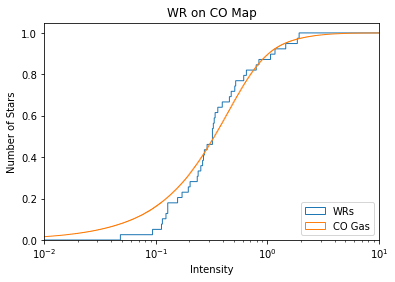

In [38]:
plt.hist(p2 ,bins=np.logspace(-4,4,1000), zorder=2, cumulative=True, histtype='step', density=True, label='WRs')
plt.hist(hdu2.data.flatten(), bins=np.logspace(-4,4,1000), cumulative=True, density=True,histtype='step', label='CO Gas' )
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('WR on CO Map')
plt.xlim(0.010,10)
plt.legend(loc = 'lower right')


In [39]:
fn = get_pkg_data_filename('atomic.fits')
f = fits.open(fn)
w = WCS(f[0].header)
sky = SkyCoord(c.ra.deg, c.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i2 = np.asarray(x, dtype='int')
j2 = np.asarray(y, dtype='int')
hdu.data.shape

[1658.19321264 1660.55470055 1658.63279258 ... -422.04280859 -424.02328067
 -431.74956309] [1602.71779601  918.16239854  945.77968352 ... 1676.47927649 1472.80148732
  937.75988984]


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(1604, 1256)

In [40]:
filterout = [] # which indeces to filter out
for idx in range(len(i2)):
    filterout.append(i2[idx] >= hdu.data.shape[0] or j2[idx] >= hdu.data.shape[1])
print(filterout)
new_i2 = []
new_j2 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i2.append(i2[idx])
        new_j2.append(j2[idx])
    else: pass
i2 = np.array(new_i2)
j2 = np.array(new_j2)
print(i2)
print(j2)
print(len(i2) == len(j2))
    # j = np.array(list(filter(lambda x: x <= 1256, j)))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, False, True, False, True, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, True, True, False, True, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, Fals

In [41]:
p3 = hdu.data[i2,j2] #RSGs on Atomic gas

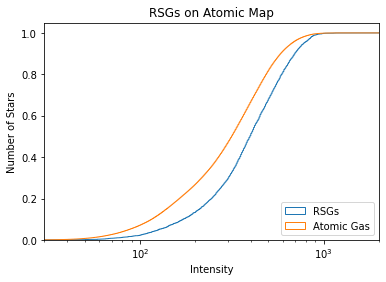

In [42]:
plt.hist(p3 ,bins=np.logspace(0,5,1000), zorder=2,histtype='step', cumulative=True, density=True, label='RSGs')
plt.hist(hdu.data.flatten(), bins=np.logspace(0,5,1000), histtype='step', cumulative=True, density=True, label='Atomic Gas')
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('RSGs on Atomic Map')
plt.xlim(30,2000)
plt.legend(loc = 'lower right')


In [43]:
hdu2.data.shape

(1, 1, 1251, 777)

In [44]:
filterout = [] # which indeces to filter out
for idx in range(len(i2)):
    filterout.append(i2[idx] >= hdu2.data.shape[2] or j2[idx] >= hdu2.data.shape[3])
print(filterout)
new_i3 = []
new_j3 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i3.append(i2[idx])
        new_j3.append(j2[idx])
    else: pass
i3 = np.array(new_i3)
j3 = np.array(new_j3)
print(i3)
print(j3)
print(len(i3) == len(j3))
    # j = np.array(list(filter(lambda x: x <= 1256, j)))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [45]:
p4 = hdu2.data[0,0,i3,j3] #RSGs on CO gas
len(p4)

3078

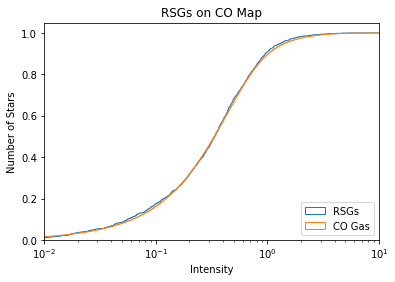

In [46]:
plt.hist(p4 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label='RSGs' )
plt.hist(hdu2.data.flatten(), bins=np.logspace(-4,4,1000), histtype='step', cumulative=True, density=True, label='CO Gas' )
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('RSGs on CO Map')
plt.xlim(0.010,10)
plt.legend(loc = 'lower right')

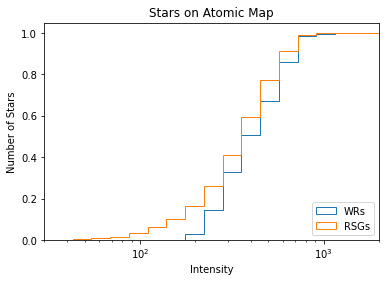

In [175]:
plt.hist(p ,bins=np.logspace(0,5,50), zorder=2, cumulative=True, density=True, histtype='step', label='WRs')
plt.hist(p3 ,bins=np.logspace(0,5,50), zorder=2,histtype='step', cumulative=True, density=True, label='RSGs')
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('Stars on Atomic Map')
plt.xlim(30,2000)
plt.legend(loc = 'lower right')

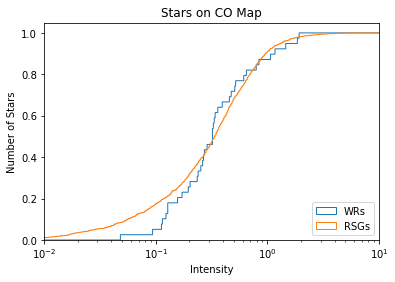

In [48]:
plt.hist(p2 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label='WRs')
plt.hist(p4 ,bins=np.logspace(-4,4,1000), zorder=2, cumulative=True, density=True, histtype='step', label='RSGs')
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('Stars on CO Map')
plt.xlim(0.010,10)
plt.legend(loc = 'lower right')

### Dividing Log L range into log L<4.5 and log L>4.5

In [49]:
table4 = pd.read_csv('RSG.tsv', sep='\t')
table4

,Name,RAJ2000,DEJ2000,LogLum
0,1,01 29 49.93,+31 19 24.2,4.18
1,2,01 29 50.82,+30 45 10.5,4.12
2,3,01 29 51.21,+30 46 33.4,4.02
3,4,01 29 52.09,+31 07 14.3,3.93
4,5,01 29 52.11,+31 24 25.6,3.99
...,...,...,...,...
7083,7084,01 37 56.07,+30 27 44.8,4.15
7084,7085,01 37 57.10,+30 04 59.2,4.78
7085,7086,01 37 57.15,+31 23 04.9,4.29
7086,7087,01 37 57.17,+31 12 53.8,4.31


Name              7088
RAJ2000    01 37 57.82
DEJ2000    +31 32 10.5
LogLum            6.02
dtype: object

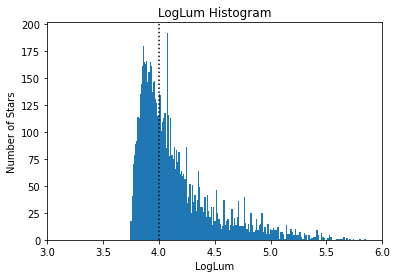

In [50]:
plt.hist(table4['LogLum'],bins=np.logspace(0,1,900))
plt.axvline(4, ls='dotted',color='black',zorder=2)
plt.xlabel('LogLum')
plt.ylabel('Number of Stars')
plt.title('LogLum Histogram')
plt.xlim(3,6)
table4.max()

In [51]:
RSG1 = table4[table4['LogLum'] < 4.50]
RSG2 = table4[table4['LogLum'] > 4.50] 
print(len(RSG1), len(RSG2))

6167 904


In [52]:
RSG2

,Name,RAJ2000,DEJ2000,LogLum
40,41,01 30 00.83,+30 04 14.7,5.11
54,55,01 30 03.26,+30 54 07.1,4.90
55,56,01 30 03.33,+30 03 03.9,4.97
85,86,01 30 07.62,+30 02 25.8,5.05
105,106,01 30 10.87,+30 07 21.9,4.87
...,...,...,...,...
6982,6983,01 37 36.11,+30 27 16.9,4.83
7003,7004,01 37 40.29,+30 15 31.7,4.66
7060,7061,01 37 52.31,+30 50 34.4,5.00
7077,7078,01 37 54.85,+30 06 24.3,5.04


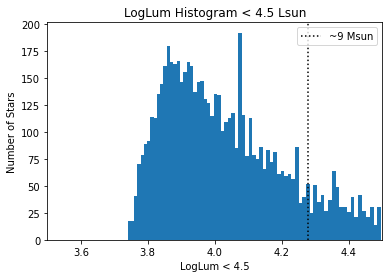

In [53]:
plt.hist(RSG1['LogLum'],bins=np.logspace(0,1,900))
plt.axvline(4.28, ls='dotted',color='black',zorder=2, label='~9 Msun')
plt.xlabel('LogLum < 4.5')
plt.ylabel('Number of Stars')
plt.title('LogLum Histogram < 4.5 Lsun')
plt.xlim(3.5,4.5)
plt.legend(loc = 'upper right')

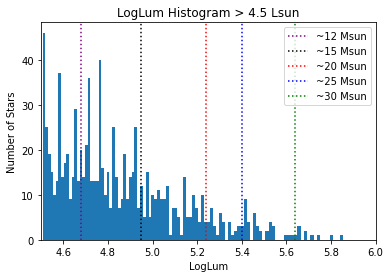

In [54]:
plt.hist(RSG2['LogLum'],bins=np.logspace(0,1,900))
plt.axvline(4.68, ls='dotted',color='purple',zorder=2, label='~12 Msun')
plt.axvline(4.95, ls='dotted',color='black',zorder=2, label= '~15 Msun')
plt.axvline(5.24, ls='dotted',color='red',zorder=2, label= '~20 Msun')
plt.axvline(5.40, ls='dotted',color='blue',zorder=2, label= '~25 Msun')
plt.axvline(5.64, ls='dotted',color='green',zorder=2, label= '~30 Msun')
plt.xlabel('LogLum')
plt.ylabel('Number of Stars')
plt.title('LogLum Histogram > 4.5 Lsun')
plt.xlim(4.5,6)
plt.legend(loc = 'upper right')

In [55]:
RA3 = RSG1['RAJ2000']
Dec3 = RSG1['DEJ2000']
d = SkyCoord(RA3, Dec3, unit=('hourangle','deg'))

In [56]:
sky = SkyCoord(d.ra.deg, d.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i5 = np.asarray(x, dtype='int')
j5 = np.asarray(y, dtype='int')

[1658.19321264 1660.55470055 1658.63279258 ... -422.04280859 -424.02328067
 -431.74956309] [1602.71779601  918.16239854  945.77968352 ... 1676.47927649 1472.80148732
  937.75988984]


In [57]:
filterout = [] # which indeces to filter out
for idx in range(len(i5)):
    filterout.append(i5[idx] >= hdu.data.shape[0] or j5[idx] >= hdu.data.shape[1])
print(filterout)
new_i5 = []
new_j5 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i5.append(i5[idx])
        new_j5.append(j5[idx])
    else: pass
i5 = np.array(new_i5)
j5 = np.array(new_j5)
print(i5)
print(j5)
print(len(i5) == len(j5))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, False, True, False, True, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, True, True, False, True, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, True, Fa

In [58]:
p5 = hdu.data[i5,j5] # RSGs < 4.5 Lsun on Atomic Map
len(p5)

5299

In [59]:
RA4 = RSG2['RAJ2000']
Dec4 = RSG2['DEJ2000']
e = SkyCoord(RA4, Dec4, unit=('hourangle','deg'))
sky = SkyCoord(e.ra.deg, e.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i6 = np.asarray(x, dtype='int')
j6 = np.asarray(y, dtype='int')

[1624.48192696 1605.59161272 1613.86147028 1595.40053759 1580.54361631
 1546.73153395 1501.77293833 1437.234293   1401.96269085 1383.11520506
 1379.77730628 1375.94823218 1356.85446633 1347.44445977 1339.35705896
 1337.0028935  1330.71527111 1321.20464211 1270.99092793 1257.71219212
 1242.85364949 1156.87491779 1145.12665892 1084.13686736 1070.56555115
 1071.50192344 1064.18863314 1031.16874851  992.54331392  986.27540323
  987.78058322  985.84744301  982.06873852  980.6725126   980.55417712
  979.48498236  978.3065478   971.83251767  969.90065197  966.71137067
  965.83913694  964.90330311  963.47147188  961.61815513  959.07999714
  952.58416914  946.36217587  935.88956119  929.47739314  928.31205703
  928.64656647  926.73575572  922.81518465  919.13354412  918.23972823
  916.96047885  914.61309363  913.10207515  910.32983431  908.43777949
  906.47734272  906.60938496  902.32018382  895.96880286  888.84623861
  885.15123034  882.69357064  882.11219503  881.9918473   878.69912909
  877.

In [60]:
filterout = [] # which indeces to filter out
for idx in range(len(i6)):
    filterout.append(i6[idx] >= hdu2.data.shape[2] or j6[idx] >= hdu2.data.shape[3])
print(filterout)
new_i6 = []
new_j6 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i6.append(i6[idx])
        new_j6.append(j6[idx])
    else: pass
i6 = np.array(new_i6)
j6 = np.array(new_j6)
print(i6)
print(j6)
print(len(i6) == len(j6))
    # j = np.array(list(filter(lambda x: x <= 1256, j)))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, 

In [61]:
p6 = hdu2.data[0,0,i6,j6] # RSGs > 4.5 Lsun on CO map
len(p6)

478

In [62]:
sky = SkyCoord(d.ra.deg, d.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i7 = np.asarray(x, dtype='int')
j7 = np.asarray(y, dtype='int')

[1658.19321264 1660.55470055 1658.63279258 ... -422.04280859 -424.02328067
 -431.74956309] [1602.71779601  918.16239854  945.77968352 ... 1676.47927649 1472.80148732
  937.75988984]


In [63]:
filterout = [] # which indeces to filter out
for idx in range(len(i7)):
    filterout.append(i7[idx] >= hdu2.data.shape[2] or j7[idx] >= hdu2.data.shape[3])
print(filterout)
new_i7 = []
new_j7 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i7.append(i7[idx])
        new_j7.append(j7[idx])
    else: pass
i7 = np.array(new_i7)
j7 = np.array(new_j7)
print(i7)
print(j7)
print(len(i7) == len(j7))
    # j = np.array(list(filter(lambda x: x <= 1256, j)))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [64]:
p7 = hdu2.data[0,0,i7,j7] #RSGs < 4.5 Lsun on CO map

In [65]:
sky = SkyCoord(e.ra.deg, e.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i8 = np.asarray(x, dtype='int')
j8 = np.asarray(y, dtype='int')

[1624.48192696 1605.59161272 1613.86147028 1595.40053759 1580.54361631
 1546.73153395 1501.77293833 1437.234293   1401.96269085 1383.11520506
 1379.77730628 1375.94823218 1356.85446633 1347.44445977 1339.35705896
 1337.0028935  1330.71527111 1321.20464211 1270.99092793 1257.71219212
 1242.85364949 1156.87491779 1145.12665892 1084.13686736 1070.56555115
 1071.50192344 1064.18863314 1031.16874851  992.54331392  986.27540323
  987.78058322  985.84744301  982.06873852  980.6725126   980.55417712
  979.48498236  978.3065478   971.83251767  969.90065197  966.71137067
  965.83913694  964.90330311  963.47147188  961.61815513  959.07999714
  952.58416914  946.36217587  935.88956119  929.47739314  928.31205703
  928.64656647  926.73575572  922.81518465  919.13354412  918.23972823
  916.96047885  914.61309363  913.10207515  910.32983431  908.43777949
  906.47734272  906.60938496  902.32018382  895.96880286  888.84623861
  885.15123034  882.69357064  882.11219503  881.9918473   878.69912909
  877.

In [66]:
filterout = [] # which indeces to filter out
for idx in range(len(i8)):
    filterout.append(i8[idx] >= hdu.data.shape[0] or j8[idx] >= hdu.data.shape[1])
print(filterout)
new_i8 = []
new_j8 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i8.append(i8[idx])
        new_j8.append(j8[idx])
    else: pass
i8 = np.array(new_i8)
j8 = np.array(new_j8)
print(i8)
print(j8)
print(len(i8) == len(j8))

[True, True, True, False, False, False, False, False, False, True, True, False, False, False, True, True, True, False, True, True, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [67]:
p8 = hdu.data[i8, j8] # RSGs > 4.5 Lsun on Atomic Map
len(p8)

873

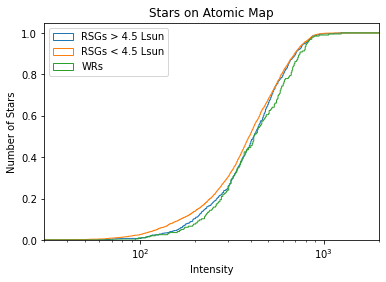

In [68]:
plt.hist(p8 ,bins=np.logspace(0,4,1000), zorder=2, histtype='step', cumulative=True, density=True, label='RSGs > 4.5 Lsun')
plt.hist(p5 ,bins=np.logspace(0,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label='RSGs < 4.5 Lsun')
plt.hist(p ,bins=np.logspace(0,4,1000), zorder=2, cumulative=True, density=True, histtype='step', label='WRs')
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('Stars on Atomic Map')
plt.xlim(30,2000)
plt.legend(loc = 'upper left')

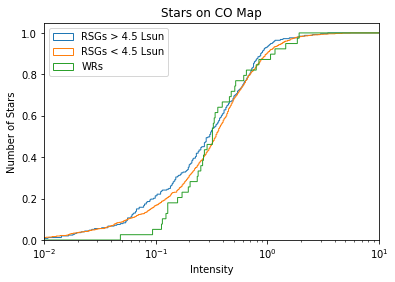

In [69]:
plt.hist(p6 ,bins=np.logspace(-4,4,1000), zorder=2, histtype='step', cumulative=True, density=True, label='RSGs > 4.5 Lsun')
plt.hist(p7 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label='RSGs < 4.5 Lsun')
plt.hist(p2 ,bins=np.logspace(-4,4,1000), zorder=2, cumulative=True, density=True, histtype='step', label='WRs')
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('Stars on CO Map')
plt.xlim(0.010,10)
plt.legend(loc = 'upper left')

In [70]:
#p1- WRs on Atomic map
#p2- WRs on CO map
#p3- RSGs on Atomic map
#p4- RSGs on CO map
#p5- RSGs < 4.5 Lsun on Atomic Map
#p6- RSGs > 4.5 Lsun on CO map
#p7- RSGs < 4.5 Lsun on CO map
#p8- RSGs > 4.5 Lsun on Atomic Map

In [71]:
print(len(p), len(p2), len(p3), len(p4), len(p5), len(p6), len(p7), len(p8))

205 93 6187 3078 5299 478 2594 873


In [72]:
RSG3 = table4[table4['LogLum'] < 4.30]
RSG4 = table4[table4['LogLum'] > 4.70] 

In [73]:
RA5 = RSG3['RAJ2000']
Dec5 = RSG3['DEJ2000']
g = SkyCoord(RA5, Dec5, unit=('hourangle','deg'))

In [74]:
sky = SkyCoord(g.ra.deg, g.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i9 = np.asarray(x, dtype='int')
j9 = np.asarray(y, dtype='int')

[1658.19321264 1660.55470055 1658.63279258 ... -421.82654184 -427.57274842
 -422.04280859] [1602.71779601  918.16239854  945.77968352 ...  942.43629861  569.80702853
 1676.47927649]


In [75]:
filterout = [] # which indeces to filter out
for idx in range(len(i9)):
    filterout.append(i9[idx] >= hdu.data.shape[0] or j9[idx] >= hdu.data.shape[1])
print(filterout)
new_i9 = []
new_j9 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i9.append(i9[idx])
        new_j9.append(j9[idx])
    else: pass
i9 = np.array(new_i9)
j9 = np.array(new_j9)
print(i9)
print(j9)
print(len(i9) == len(j9))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, False, True, False, True, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False

In [76]:
p9 = hdu.data[i9, j9] # RSGs < 4.3 Lsun on Atomic Map
len(p9)

4724

In [77]:
RA6 = RSG4['RAJ2000']
Dec6 = RSG4['DEJ2000']
h = SkyCoord(RA6, Dec6, unit=('hourangle','deg'))

In [78]:
sky = SkyCoord(h.ra.deg, h.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i10 = np.asarray(x, dtype='int')
j10 = np.asarray(y, dtype='int')

[1624.48192696 1605.59161272 1613.86147028 1595.40053759 1580.54361631
 1546.73153395 1501.77293833 1437.234293   1401.96269085 1383.11520506
 1379.77730628 1356.85446633 1347.44445977 1339.35705896 1337.0028935
 1330.71527111 1321.20464211 1270.99092793 1257.71219212 1242.85364949
 1156.87491779 1145.12665892 1084.13686736 1070.56555115 1071.50192344
 1064.18863314 1031.16874851  986.27540323  987.78058322  982.06873852
  979.48498236  969.90065197  966.71137067  965.83913694  961.61815513
  929.47739314  928.31205703  926.73575572  922.81518465  919.13354412
  916.96047885  910.32983431  906.47734272  888.84623861  885.15123034
  882.11219503  881.9918473   877.79266598  875.47082319  871.36360008
  869.75070217  863.60882193  863.12622046  862.2306845   861.2974169
  861.18629872  859.34640116  857.49380793  856.10918608  849.83328815
  849.78085583  848.0663063   846.46480061  846.05165725  844.26344518
  843.88431616  843.43094011  843.13327623  840.34869824  837.97230578
  836.52

In [79]:
filterout = [] # which indeces to filter out
for idx in range(len(i10)):
    filterout.append(i10[idx] >= hdu.data.shape[0] or j10[idx] >= hdu.data.shape[1])
print(filterout)
new_i10 = []
new_j10 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i10.append(i10[idx])
        new_j10.append(j10[idx])
    else: pass
i10 = np.array(new_i10)
j10 = np.array(new_j10)
print(i10)
print(j10)
print(len(i10) == len(j10))

[True, True, True, False, False, False, False, False, False, True, True, False, False, True, True, True, False, True, True, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [80]:
p10 = hdu.data[i10, j10] # RSGs > 4.7 Lsun on Atomic Map
len(p10)

545

In [81]:
sky = SkyCoord(g.ra.deg, g.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i11= np.asarray(x, dtype='int')
j11 = np.asarray(y, dtype='int')

[1658.19321264 1660.55470055 1658.63279258 ... -421.82654184 -427.57274842
 -422.04280859] [1602.71779601  918.16239854  945.77968352 ...  942.43629861  569.80702853
 1676.47927649]


In [82]:
filterout = [] # which indeces to filter out
for idx in range(len(i11)):
    filterout.append(i11[idx] >= hdu2.data.shape[2] or j11[idx] >= hdu2.data.shape[3])
print(filterout)
new_i11 = []
new_j11 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i11.append(i11[idx])
        new_j11.append(j11[idx])
    else: pass
i11 = np.array(new_i11)
j11 = np.array(new_j11)
print(i11)
print(j11)
print(len(i11) == len(j11))
    # j = np.array(list(filter(lambda x: x <= 1256, j)))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [83]:
p11 = hdu2.data[0,0,i11,j11] #RSGs < 4.3 Lsun on CO map
len(p11)

2279

In [84]:
sky = SkyCoord(h.ra.deg, h.dec.deg , unit=('deg'))
x, y = w.world_to_pixel(sky)
print(x, y)
f.close()
i12= np.asarray(x, dtype='int')
j12 = np.asarray(y, dtype='int')

[1624.48192696 1605.59161272 1613.86147028 1595.40053759 1580.54361631
 1546.73153395 1501.77293833 1437.234293   1401.96269085 1383.11520506
 1379.77730628 1356.85446633 1347.44445977 1339.35705896 1337.0028935
 1330.71527111 1321.20464211 1270.99092793 1257.71219212 1242.85364949
 1156.87491779 1145.12665892 1084.13686736 1070.56555115 1071.50192344
 1064.18863314 1031.16874851  986.27540323  987.78058322  982.06873852
  979.48498236  969.90065197  966.71137067  965.83913694  961.61815513
  929.47739314  928.31205703  926.73575572  922.81518465  919.13354412
  916.96047885  910.32983431  906.47734272  888.84623861  885.15123034
  882.11219503  881.9918473   877.79266598  875.47082319  871.36360008
  869.75070217  863.60882193  863.12622046  862.2306845   861.2974169
  861.18629872  859.34640116  857.49380793  856.10918608  849.83328815
  849.78085583  848.0663063   846.46480061  846.05165725  844.26344518
  843.88431616  843.43094011  843.13327623  840.34869824  837.97230578
  836.52

In [85]:
filterout = [] # which indeces to filter out
for idx in range(len(i12)):
    filterout.append(i12[idx] >= hdu2.data.shape[2] or j12[idx] >= hdu2.data.shape[3])
print(filterout)
new_i12 = []
new_j12 = []
for idx in range(len(filterout)):
    if not filterout[idx]:
        new_i12.append(i12[idx])
        new_j12.append(j12[idx])
    else: pass
i12 = np.array(new_i12)
j12 = np.array(new_j12)
print(i12)
print(j12)
print(len(i12) == len(j12))
    # j = np.array(list(filter(lambda x: x <= 1256, j)))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, True, True, True, False, True, False, True, True, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, Fals

In [86]:
p12 = hdu2.data[0,0,i12,j12] #RSGs > 4.7 Lsun on CO map
len(p12)

297

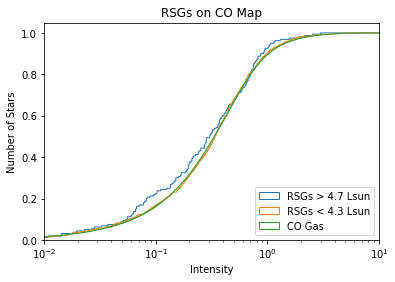

In [87]:
plt.hist(p12 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label='RSGs > 4.7 Lsun' )
plt.hist(p11 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label='RSGs < 4.3 Lsun' )
plt.hist(hdu2.data.flatten(), bins=np.logspace(-4,4,1000), histtype='step', cumulative=True, density=True, label='CO Gas' )
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Stars')
plt.title('RSGs on CO Map')
plt.xlim(0.010,10)
plt.legend(loc = 'lower right')

### Filtering Out Pixels

In [88]:
import seaborn as sns

In [89]:
#Getting RMS values
rms = np.array([.431, .438, .404, .311, .290, .309, .453, .412, .360])
sort1 = np.sort(rms)
sigma_std = np.average(sort1)

#Getting median values
med = np.array([0.03, -0.088, 0.048, -0.074, 0.040, 0.110, -0.093, 0.078, -0.009])
sort2 = np.sort(med)

#Getting our percentiles
sixteen = sort2[1]
fifty = sort2[4]
eightythree = sort2[7]
tiles = [sixteen, fifty, eightythree]
sigma_back = (eightythree - sixteen) / 2.0

#Summing in quadrature to get SD
Sigma = np.sqrt(sigma_std**2 + sigma_back**2)
print(Sigma)

0.3876563483866148


In [90]:
arr = hdu2.data[0,0]
mask_list = [arr < 0.15] #Picking a minimum sigma to exclude noisy pixels
arr[mask_list] = float('nan')
print(arr)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


<ipython-input-90-39c420ad961d>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  arr[mask_list] = float('nan')


Text(0.5, 1.0, 'CO Map')

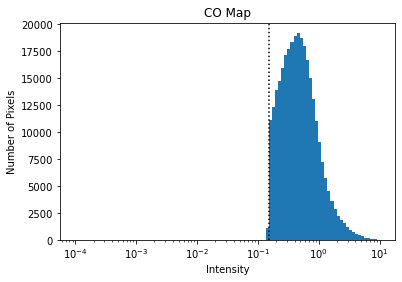

In [91]:
plt.hist(arr.flatten() ,bins=np.logspace(-4,1,100))
plt.axvline(0.15, ls='dotted',color='black',zorder=2)
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.title('CO Map')

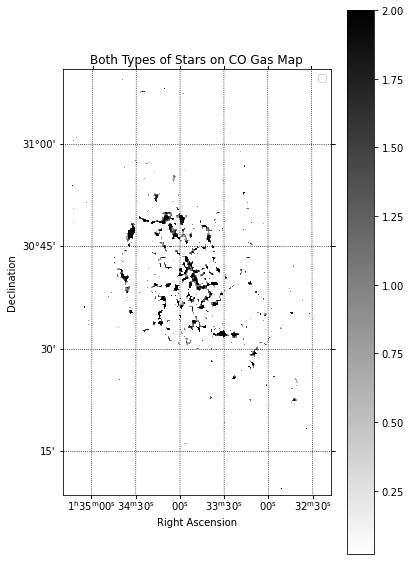

In [92]:
fig = plt.figure(figsize = (6,10))
ax = plt.subplot(projection=wcs6, label='overlays')
plt.imshow(arr, cmap='gray_r', vmin=0.02, vmax=2)
plt.colorbar()
plt.title('Both Types of Stars on CO Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
ax.set_xlim(15,800)
ax.set_ylim(0,1251)
location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["RSG", "WR"], loc=0, frameon=legend_drawn_flag)

In [93]:
# Create an empty list
filter_p4 = []

# go through each pixel in p4
for element in p4:
# if the pixel is higher than 0.15, set the value to True, otherwise False:
  if element > 0.15:
    filter_p4.append(True)
  else:
    filter_p4.append(False)

newp4 = p4[filter_p4]

print(filter_p4)
print(newp4)


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, Fals

In [94]:
arr1 = arr[~np.isnan(arr)]
print(np.sort(arr1), len(arr1))

[ 0.15000008  0.15000023  0.15001163 ... 15.972839   15.972839
 16.038292  ] 296710


In [95]:
_RSG = np.array(newp4) #RSG pixels
arr_RSG = np.sort(_RSG)
print(arr_RSG, len(arr_RSG), arr_RSG.max())

[0.15094733 0.15168451 0.15204972 ... 4.69331    4.740654   5.5120187 ] 1097 5.5120187


In [96]:
arr_sort = np.sort(arr1) #CO pixels
print(arr_sort, len(arr_sort))

[ 0.15000008  0.15000023  0.15001163 ... 15.972839   15.972839
 16.038292  ] 296710


In [97]:
CO_fifty = np.where(arr_sort >= 0.45188865)# 50th percentile;Find the index where RSG pixel value equals CO pixel value
RSG_fifty = arr_RSG[arr_RSG > 0.45188865]
print(CO_fifty, len(CO_fifty), RSG_fifty)  

(array([148355, 148356, 148357, ..., 296707, 296708, 296709]),) 1 [0.45201388 0.45208165 0.45214844 0.4538391  0.45450017 0.45546237
 0.45554036 0.45676222 0.45676568 0.45756686 0.45845157 0.45986277
 0.4605789  0.4609003  0.46134126 0.461597   0.46286955 0.46526924
 0.467494   0.47005498 0.47022754 0.471808   0.47186163 0.47203276
 0.4732714  0.473771   0.47450432 0.47455797 0.4769351  0.4770841
 0.4772216  0.47838452 0.47848868 0.47915426 0.48071742 0.48085022
 0.48185658 0.48255065 0.48343396 0.48364773 0.48382983 0.48495308
 0.48529443 0.48696876 0.48743275 0.4880444  0.49048737 0.491446
 0.49193752 0.49218    0.4922034  0.49243936 0.49250212 0.4926986
 0.4928428  0.49311215 0.49356002 0.49391398 0.49391684 0.49433044
 0.49786982 0.49858788 0.4990833  0.4991821  0.5013722  0.5013918
 0.50199074 0.5023383  0.5024313  0.5038012  0.50407743 0.5041285
 0.5071186  0.50860995 0.50877506 0.51012665 0.510883   0.51133925
 0.51167035 0.51397324 0.51564384 0.5166199  0.5190699  0.5202742
 0.

In [98]:
CO_seven = np.where(arr_sort >= 0.7353491)# 75th percentile;Find the index where RSG pixel value equals CO pixel value
RSG_seventy = arr_RSG[arr_RSG > 0.7353491]
np.where(arr_RSG >= 0.7353491)
print(arr_sort[222533], CO_seven, len(CO_seven), RSG_seventy)

0.7353491 (array([222533, 222534, 222535, ..., 296707, 296708, 296709]),) 1 [0.735782   0.738118   0.74369895 0.74646527 0.74680907 0.75138724
 0.75148374 0.75464827 0.7553498  0.75535864 0.7571609  0.7582658
 0.7585736  0.75919455 0.75937545 0.7603007  0.761261   0.76468
 0.7674633  0.77062994 0.7714137  0.7721754  0.7728946  0.776228
 0.7813591  0.7823528  0.7837431  0.788205   0.78840053 0.78874403
 0.7889888  0.7901294  0.79036826 0.7932615  0.7944952  0.7956736
 0.79655427 0.7974873  0.7980601  0.8016734  0.80249333 0.80391
 0.806334   0.8088992  0.8107306  0.81341106 0.81445915 0.81526554
 0.8159316  0.8185502  0.8186017  0.8189231  0.82376444 0.8257723
 0.8279754  0.82931584 0.82968605 0.83156866 0.8326124  0.8363043
 0.83844584 0.84133565 0.84491986 0.84761745 0.84842193 0.8561334
 0.8576168  0.8596794  0.86215097 0.86231595 0.8642104  0.8647626
 0.86649555 0.86676174 0.8683681  0.8712466  0.87399536 0.87764186
 0.8779699  0.88036025 0.88121414 0.8826459  0.8827662  0.8839502
 

In [99]:
CO_ninety = np.where(arr_sort >= 1.1820986) # 90th percentile; Find the index where RSG pixel value equals CO pixel value
RSG_ninety = arr_RSG[arr_RSG > 1.1820986]
print(RSG_ninety, len(RSG_ninety))

[1.1850243 1.1971505 1.2147958 1.2320412 1.233497  1.2377858 1.238869
 1.2585922 1.262338  1.2644855 1.2660989 1.2687402 1.3014172 1.321776
 1.3256049 1.3267486 1.328272  1.3406893 1.3427783 1.3613558 1.3688413
 1.3711084 1.3799568 1.3854054 1.3885592 1.389613  1.3932631 1.396129
 1.4170725 1.4299548 1.4444412 1.446411  1.4488574 1.4573723 1.4753332
 1.5210236 1.5295758 1.5422413 1.545681  1.5742592 1.5927011 1.6059308
 1.608281  1.6116251 1.6153309 1.6204437 1.6275897 1.6287497 1.6710811
 1.6818559 1.7180321 1.7489733 1.7548116 1.7584524 1.7586999 1.7904755
 1.7973291 1.8464873 1.8594499 1.8784683 1.9487165 1.9560816 1.963903
 1.9796381 2.0391383 2.0732272 2.1034021 2.1505778 2.2017179 2.3231072
 2.352328  2.4054503 2.4640627 2.5258942 2.575718  2.6573663 2.8418982
 2.9613984 2.9868507 3.0435095 3.2018232 3.4414895 3.5129063 3.5933118
 4.0686617 4.135271  4.69331   4.740654  5.5120187] 89


In [100]:
print(arr_RSG, len(arr_RSG), arr_sort, len(arr_sort))

[0.15094733 0.15168451 0.15204972 ... 4.69331    4.740654   5.5120187 ] 1097 [ 0.15000008  0.15000023  0.15001163 ... 15.972839   15.972839
 16.038292  ] 296710


In [101]:
indeces =[]

for object in arr_RSG:
    indeces.append(np.where(arr_sort==object)[0][0])
print(indeces, len(indeces))

[554, 970, 1182, 1562, 2395, 2408, 2647, 2813, 2875, 3014, 3475, 3796, 3885, 4214, 4411, 4449, 4664, 4771, 4786, 6037, 6522, 6677, 6885, 7445, 7841, 7933, 8202, 8235, 8355, 8417, 8584, 9261, 10032, 10088, 10906, 11098, 11447, 12011, 12344, 12461, 12558, 12972, 13098, 13146, 13170, 13199, 13260, 13920, 14037, 14275, 14697, 15135, 15391, 15451, 15565, 15618, 16141, 16720, 17162, 17385, 17489, 17845, 18514, 18739, 19366, 19641, 19655, 19713, 19780, 19939, 20108, 20120, 21530, 21754, 21904, 22098, 22515, 22608, 22700, 22833, 22930, 22944, 23349, 23564, 23753, 24029, 25132, 26021, 26046, 26053, 26063, 26071, 26420, 26491, 27154, 27352, 27624, 27686, 27983, 28346, 28703, 28824, 28855, 29258, 29420, 29744, 29747, 29993, 30141, 30175, 30206, 30210, 30424, 30697, 30896, 31022, 31377, 31596, 31741, 32196, 32506, 32545, 34321, 34523, 34749, 35036, 35101, 35282, 35639, 35745, 36233, 36315, 36373, 36755, 36995, 37501, 37603, 37708, 38095, 38426, 38581, 39519, 39644, 39683, 39774, 39844, 40076, 4039

In [102]:
indeces_percentile = []

for index in indeces:
    indeces_percentile.append(index / 296710)
print(indeces_percentile)

[0.0018671430015840384, 0.00326918539988541, 0.00398368777594284, 0.005264399582083516, 0.008071854672912946, 0.008115668497859864, 0.008921168818037815, 0.009480637659667689, 0.00968959590172222, 0.010158066799231574, 0.011711772437733815, 0.012793636884500017, 0.01309359307067507, 0.01420241987125476, 0.0148663678339119, 0.014994439014525967, 0.015719052273263454, 0.01607967375551886, 0.016130228168919146, 0.02034646624650332, 0.021981058946446023, 0.022503454551582352, 0.02320447575073304, 0.025091840517677193, 0.026426477031444844, 0.026736544100299957, 0.027643153247278486, 0.027754372956759126, 0.028158808263961443, 0.028367766506015975, 0.028930605641872536, 0.03121229483333895, 0.03381079168211385, 0.033999528158808266, 0.036756428836237406, 0.03740352532776112, 0.03857975801287453, 0.040480603956725425, 0.04160291193421186, 0.04199723635873412, 0.04232415489872266, 0.04371945670857066, 0.044144113781133094, 0.04430588790401402, 0.044386774965454484, 0.04448451349802838, 0.0446

<ipython-input-103-668bc2db898b>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1)
No handles with labels found to put in legend.


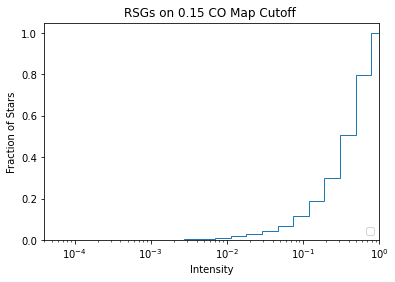

In [103]:
plt.hist(indeces_percentile ,bins=np.logspace(-4,4,40), zorder=2,histtype='step', cumulative=True, density=True)
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('RSGs on 0.15 CO Map Cutoff ')
plt.xlim(0,1)
plt.legend(loc = 'lower right')


No handles with labels found to put in legend.


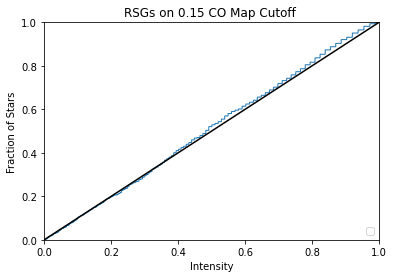

In [104]:
y = x
plt.hist(indeces_percentile ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True)
plt.plot(x,y, 'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('RSGs on 0.15 CO Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

In [105]:
filter_p2 = []

# go through each pixel in p4
for element in p2:
# if the pixel is higher than 0.15, set the value to True, otherwise False:
  if element > 0.15:
    filter_p2.append(True)
  else:
    filter_p2.append(False)

newp2 = p2[filter_p2]

print(filter_p2)
print(newp2)

[False, False, True, True, False, True, True, False, True, False, False, False, True, False, True, False, True, False, True, False, False, True, True, True, True, True, True, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, True, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, True, False]
[1.8693645  0.622407   0.17451382 0.26694524 0.15922505 0.1956871
 0.34581298 0.26970026 0.24272764 0.29130322 0.33904415 0.80266106
 0.6532439  0.32769403 0.845374   0.5179753  1.4623301  0.52139556
 1.933059   0.33281928 0.20377675 1.0825096  0.23549615 0.325375
 0.478513   0.25462535 0.32530284 0.27594653 0.36335948 0.39981812
 0.46148333 1.1867532 ]


In [106]:
_WR = np.array(newp2) #WR pixels
arr_WR = np.sort(_WR)

In [107]:
indeces_WR =[]

for object in arr_WR:
    indeces_WR.append(np.where(arr_sort==object)[0][0])
print(indeces_WR, len(indeces_WR))

[5472, 14456, 26916, 31702, 49678, 53647, 60075, 66611, 68064, 71296, 79157, 95775, 95811, 96943, 99303, 102166, 105283, 112959, 128277, 151877, 157823, 170815, 171832, 199332, 206414, 233280, 238997, 261167, 267266, 277534, 285079, 285913] 32


In [108]:
indecesWR_percentile = []

for index in indeces_WR:
    indecesWR_percentile.append(index / 296710)
print(indecesWR_percentile, len(indecesWR_percentile))

[0.018442250008425736, 0.04872097334097267, 0.0907148394054801, 0.10684506757439924, 0.1674294765933066, 0.1808061743790233, 0.20247042566816084, 0.22449866873378047, 0.2293957062451552, 0.24028849718580433, 0.2667823801017829, 0.3227899295608507, 0.32291126015301136, 0.3267264332176199, 0.33468032759259886, 0.3443294799636008, 0.35483468706818105, 0.3807050655522227, 0.4323312325165987, 0.5118701762663881, 0.531909945738263, 0.5756968083313674, 0.579124397559907, 0.6718074887937717, 0.6956759125071619, 0.7862222372013077, 0.8054902092952715, 0.8802096323008999, 0.9007650567894577, 0.9353712379090695, 0.9608001078494153, 0.9636109332344713] 32


No handles with labels found to put in legend.


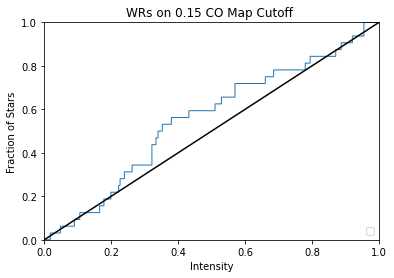

In [109]:
y = x
plt.hist(indecesWR_percentile ,bins=np.logspace(-4,4,1000), zorder=2, histtype='step', cumulative=True, density=True)
plt.plot(x,y, 'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('WRs on 0.15 CO Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

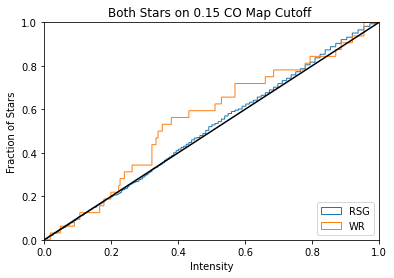

In [110]:
y = x
plt.hist(indeces_percentile ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label = 'RSG')
plt.hist(indecesWR_percentile ,bins=np.logspace(-4,4,1000), zorder=2, histtype='step', cumulative=True, density=True, label = 'WR')
plt.plot(x,y, 'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('Both Stars on 0.15 CO Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

### Different Cutoff

In [111]:
CO_arr = hdu2.data[0,0]
mask_list = [CO_arr < 0.25] #Picking a minimum sigma to exclude noisy pixels
CO_arr[mask_list] = float('nan')
print(CO_arr, len(CO_arr))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]] 1251


<ipython-input-111-72e9eabcac6a>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  CO_arr[mask_list] = float('nan')


Text(0.5, 1.0, 'CO Map')

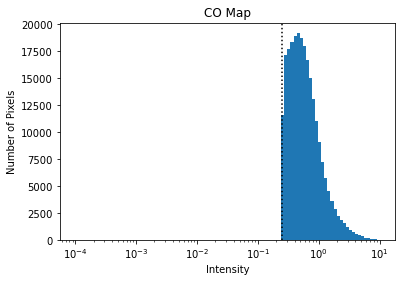

In [112]:
plt.hist(CO_arr.flatten() ,bins=np.logspace(-4,1,100))
plt.axvline(0.25, ls='dotted',color='black',zorder=2)
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.title('CO Map')

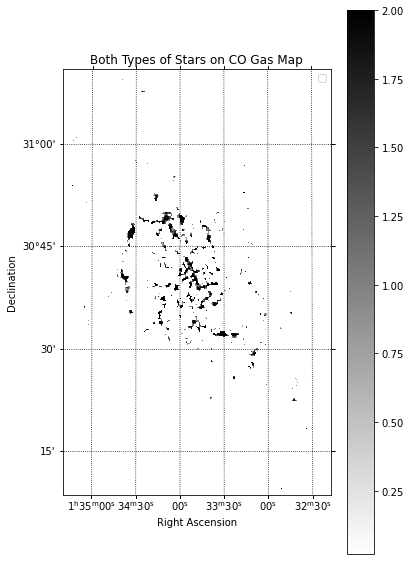

In [113]:
fig = plt.figure(figsize = (6,10))
ax = plt.subplot(projection=wcs6, label='overlays')
plt.imshow(CO_arr, cmap='gray_r', vmin=0.02, vmax=2)
plt.colorbar()
plt.title('Both Types of Stars on CO Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
ax.set_xlim(15,800)
ax.set_ylim(0,1251)
location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["RSG", "WR"], loc=0, frameon=legend_drawn_flag)

In [114]:
CO_25 = CO_arr[~np.isnan(CO_arr)]
print(np.sort(CO_25), len(CO_25))

[ 0.2500008   0.25000167  0.25000286 ... 15.972839   15.972839
 16.038292  ] 239112


In [115]:
arr_sort_CO_25 = np.sort(CO_25) #CO pixels
print(arr_sort_CO_25, len(arr_sort_CO_25))

[ 0.2500008   0.25000167  0.25000286 ... 15.972839   15.972839
 16.038292  ] 239112


In [116]:
filter_p4_25 = []

# go through each pixel in p4
for element in p4:
# if the pixel is higher than 0.25, set the value to True, otherwise False:
  if element > 0.25:
    filter_p4_25.append(True)
  else:
    filter_p4_25.append(False)

newp4_25 = p4[filter_p4_25]

print(filter_p4_25)
print(newp4_25)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, Fa

In [117]:
_RSG_25 = np.array(newp4_25) #RSG pixels
arr_RSG_25 = np.sort(_RSG_25)
print(arr_RSG_25, len(arr_RSG_25), arr_RSG_25.max())

[0.2506179  0.25101095 0.2510336  0.25115305 0.25253507 0.25364104
 0.2539345  0.25399435 0.25451645 0.25536904 0.25595397 0.25678563
 0.25706297 0.25728154 0.25757396 0.25881138 0.25901642 0.2607228
 0.26180786 0.2639021  0.2642602  0.26456746 0.26614195 0.26693028
 0.2670515  0.2674668  0.2682288  0.26857102 0.26938412 0.2695188
 0.27007967 0.27053744 0.27147347 0.27179262 0.27207384 0.27225116
 0.27246615 0.27270964 0.27271816 0.2729159  0.27294388 0.27366352
 0.2744333  0.27447116 0.27467054 0.27555937 0.27657926 0.2773637
 0.27753803 0.27858993 0.27940533 0.28001258 0.28067383 0.2808232
 0.28091902 0.28232288 0.2827367  0.2828522  0.28328675 0.28329566
 0.28345668 0.28348136 0.28369457 0.28407595 0.28458622 0.28489798
 0.28508982 0.2856554  0.28586602 0.28605673 0.28678495 0.28775337
 0.28817523 0.28905457 0.2890831  0.28988075 0.2899506  0.28999892
 0.2931322  0.2933444  0.29376855 0.2946461  0.2951442  0.29551023
 0.29577354 0.29823473 0.3002068  0.3006367  0.30119273 0.30196944

In [118]:
indeces_RSG_25 =[]

for object in arr_RSG_25:
    indeces_RSG_25.append(np.where(arr_sort_CO_25==object)[0][0])
print(indeces_RSG_25, len(indeces_RSG_25))

[333, 551, 569, 642, 1377, 1959, 2128, 2166, 2428, 2877, 3173, 3651, 3797, 3910, 4068, 4716, 4818, 5720, 6278, 7393, 7586, 7738, 8585, 9004, 9077, 9329, 9709, 9882, 10300, 10360, 10666, 10909, 11400, 11540, 11683, 11769, 11874, 12003, 12007, 12105, 12115, 12495, 12915, 12932, 13037, 13517, 14057, 14467, 14553, 15093, 15520, 15840, 16159, 16232, 16275, 16975, 17191, 17245, 17479, 17484, 17561, 17572, 17673, 17863, 18114, 18285, 18379, 18683, 18790, 18877, 19249, 19748, 19948, 20416, 20428, 20822, 20855, 20883, 22455, 22565, 22800, 23257, 23501, 23680, 23798, 25096, 26131, 26337, 26615, 27017, 27403, 27546, 27615, 27653, 27660, 27823, 28270, 28404, 29214, 29468, 29609, 29649, 29879, 30135, 30778, 30860, 30931, 31005, 31248, 31252, 31666, 31942, 32046, 32198, 32645, 32810, 33129, 33238, 33278, 33495, 34184, 34559, 34609, 35021, 35140, 35209, 35247, 35316, 35641, 35886, 36344, 36364, 36880, 36944, 36972, 37041, 38283, 38422, 38469, 38707, 38740, 38810, 38908, 38991, 39002, 39089, 39448, 39

In [119]:
indeces_percentile_RSG_25 = []

for index in indeces_RSG_25:
    indeces_percentile_RSG_25.append(index / 239112)
print(indeces_percentile_RSG_25)

[0.001392652815417043, 0.0023043594633477197, 0.0023796379939108035, 0.002684934256749975, 0.005758807588075881, 0.008192813409615578, 0.008899595168791194, 0.009058516511091037, 0.010154237344842585, 0.012032018468332831, 0.01326993208203687, 0.015268995282545418, 0.015879587808223763, 0.016352169694536452, 0.01701294790725685, 0.019722975007527854, 0.020149553347385326, 0.02392184415671317, 0.02625547860416876, 0.03091856535849309, 0.03172571849175282, 0.03236140386095219, 0.03590367693800395, 0.037655993843889055, 0.037961290106728225, 0.039015189534611396, 0.04060440295760982, 0.041327913279132794, 0.04307604804443106, 0.04332697647964134, 0.04460671149921376, 0.045622971661815385, 0.047676402689952824, 0.048261902372110144, 0.04885994847602797, 0.049219612566496034, 0.04965873732811402, 0.05019823346381612, 0.05021496202616347, 0.05062481180367359, 0.05066663320954197, 0.0522558466325404, 0.05401234567901234, 0.05408344206898859, 0.05452256683060658, 0.0565299943122888, 0.05878835

No handles with labels found to put in legend.


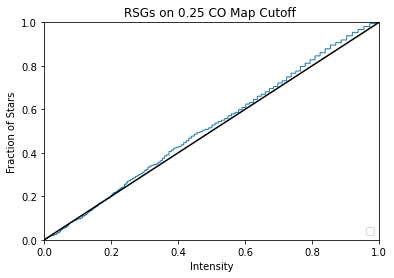

In [120]:
y = x
plt.hist(indeces_percentile_RSG_25 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True)
plt.plot(x,y,'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('RSGs on 0.25 CO Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

In [121]:
filter_p2_25 = []

# go through each pixel in p4
for element in p2:
# if the pixel is higher than 0.25, set the value to True, otherwise False:
  if element > 0.25:
    filter_p2_25.append(True)
  else:
    filter_p2_25.append(False)

newp2_25 = p2[filter_p2_25]

print(filter_p2_25)
print(newp2_25)

[False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, True, True, True, True, True, True, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, True, False]
[1.8693645  0.622407   0.26694524 0.34581298 0.26970026 0.29130322
 0.33904415 0.80266106 0.6532439  0.32769403 0.845374   0.5179753
 1.4623301  0.52139556 1.933059   0.33281928 1.0825096  0.325375
 0.478513   0.25462535 0.32530284 0.27594653 0.36335948 0.39981812
 0.46148333 1.1867532 ]


In [122]:
_WR_25 = np.array(newp2_25) #WR pixels
arr_WR_25 = np.sort(_WR_25)
print(arr_WR_25, len(arr_WR_25), arr_WR_25.max())

[0.25462535 0.26694524 0.26970026 0.27594653 0.29130322 0.32530284
 0.325375   0.32769403 0.33281928 0.33904415 0.34581298 0.36335948
 0.39981812 0.46148333 0.478513   0.5179753  0.52139556 0.622407
 0.6532439  0.80266106 0.845374   1.0825096  1.1867532  1.4623301
 1.8693645  1.933059  ] 26 1.933059


In [123]:
indeces_WR_25 =[]

for object in arr_WR_25:
    indeces_WR_25.append(np.where(arr_sort_CO_25==object)[0][0])
print(indeces_WR_25, len(indeces_WR_25))

[2477, 9013, 10466, 13698, 21559, 38177, 38213, 39345, 41705, 44568, 47685, 55361, 70679, 94279, 100225, 113217, 114234, 141734, 148816, 175682, 181399, 203569, 209668, 219936, 227481, 228315] 26


In [124]:
indeces_percentile_WR_25 = []

for index in indeces_WR_25:
    indeces_percentile_WR_25.append(index / 239112)
print(indeces_percentile_WR_25)

[0.010359162233597645, 0.0376936331091706, 0.043770283381846166, 0.05728696175850648, 0.09016276891163974, 0.15966158118371307, 0.15981213824483922, 0.16454632138913983, 0.17441617317407743, 0.18638964167419453, 0.19942537388336845, 0.23152748502793669, 0.2955895145371207, 0.3942880323864967, 0.4191550403158353, 0.47348941082003415, 0.47774264779684833, 0.5927515139348924, 0.6223694335708789, 0.7347268225768677, 0.7586361203118204, 0.8513541771220181, 0.8768610525611429, 0.9198032721067951, 0.9513575228344876, 0.9548454280839105]


No handles with labels found to put in legend.


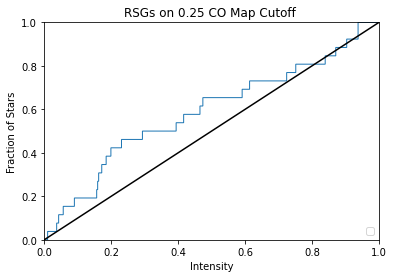

In [125]:
y = x
plt.hist(indeces_percentile_WR_25 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True)
plt.plot(x,y,'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('RSGs on 0.25 CO Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

In [126]:
atomic_arr = hdu.data
mask_list = [atomic_arr < 200] #Picking a minimum sigma to exclude noisy pixels
atomic_arr[mask_list] = float('nan')
print(atomic_arr, len(atomic_arr))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]] 1604


<ipython-input-126-5cdef1262acd>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  atomic_arr[mask_list] = float('nan')


(0.0, 1256.0)

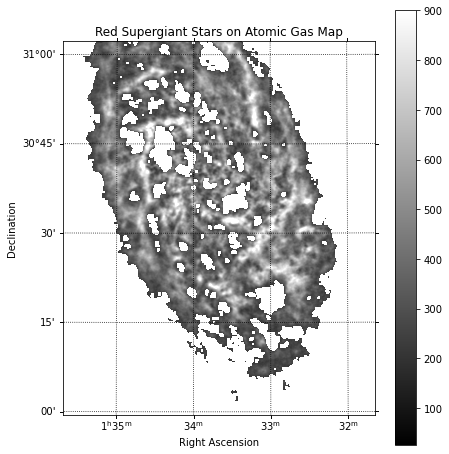

In [127]:
fig = plt.figure(figsize = (7, 8))
ax = plt.subplot(projection=wcs , label='overlays')

plt.imshow(atomic_arr, cmap='gray', vmin=25, vmax=900)
plt.colorbar()
plt.title('Red Supergiant Stars on Atomic Gas Map')

ax.coords.grid(True, color='black', ls='dotted')
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')

ax.set_xlim(150,1200)
ax.set_ylim(0,1256)

In [128]:
filter_p = []

# go through each pixel in p4
for element in p:
# if the pixel is higher than 0.15, set the value to True, otherwise False:
  if element > 200:
    filter_p.append(True)
  else:
    filter_p.append(False)

newp = p[filter_p]

print(filter_p)
print(newp)

[True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True

In [129]:
_WR_200 = np.array(newp) #WR pixels
arr_WR_200 = np.sort(_WR_200)
print(arr_WR_200, len(arr_WR_200), arr_WR_200.max())

[ 201.86032007  206.12547255  207.03669398  211.9901038   217.70990721
  224.45260222  225.68021241  227.58368752  229.83453904  231.9705514
  233.59259286  237.41140136  239.61641584  247.52279696  248.34964163
  251.67048559  259.60568176  260.91056764  261.77911383  264.94737847
  267.88893764  273.36786403  274.18073236  277.36580236  277.65103266
  278.86630984  282.26306458  284.11661441  289.90766757  295.3440443
  295.50924438  300.63131248  304.14187787  304.1886433   305.4352157
  305.56038898  308.10779895  308.95344572  312.47256319  312.7411503
  314.43110891  314.91077056  317.7156686   321.13119375  321.27217397
  326.63304067  329.93868677  331.54704626  335.66682131  338.57194236
  338.75570181  338.8865936   341.65667051  347.63608631  350.62566452
  351.17199022  352.15530033  352.95146335  354.40541496  357.62788332
  359.40684835  363.75588199  365.41589924  366.90917824  369.91539971
  370.2402721   370.85741576  371.73645575  380.18149647  380.4663684
  391.68077

In [130]:
indeces_WR_200 =[]

for object in arr_WR_200:
    indeces_WR_200.append(np.where(atomic_arr==object)[0][0])
print(indeces_WR_200, len(indeces_WR_200))

[523, 862, 777, 798, 694, 308, 605, 509, 543, 582, 399, 336, 811, 601, 290, 662, 637, 865, 613, 794, 590, 832, 624, 632, 577, 300, 505, 554, 656, 678, 796, 522, 403, 794, 451, 607, 687, 968, 662, 426, 968, 491, 801, 523, 481, 928, 826, 675, 674, 608, 685, 398, 857, 641, 579, 616, 498, 653, 836, 510, 608, 674, 963, 542, 782, 674, 515, 661, 621, 621, 611, 814, 847, 591, 665, 609, 596, 493, 492, 786, 863, 587, 505, 607, 677, 700, 495, 943, 646, 944, 618, 815, 675, 642, 462, 592, 606, 783, 585, 730, 799, 677, 515, 795, 733, 778, 690, 728, 859, 695, 590, 551, 599, 631, 701, 617, 605, 668, 556, 800, 607, 815, 621, 801, 792, 622, 560, 768, 668, 834, 793, 667, 780, 620, 627, 823, 781, 925, 624, 676, 449, 675, 675, 451, 631, 642, 451, 672, 450, 449, 451, 449, 519, 632, 520, 683, 445, 443, 519, 700, 444, 702, 706, 909, 700, 700, 704, 702, 910, 703, 647, 645, 706, 707, 550, 661, 584, 649, 651, 650] 180


In [131]:
indeces_percentile_WR_200 = []

for index in indeces_WR_200:
    indeces_percentile_WR_200.append(index / 1604)
print(indeces_percentile_WR_200, len(indeces_percentile_WR_200))

[0.3260598503740648, 0.5374064837905237, 0.4844139650872818, 0.4975062344139651, 0.43266832917705733, 0.19201995012468828, 0.37718204488778057, 0.31733167082294267, 0.3385286783042394, 0.3628428927680798, 0.24875311720698254, 0.20947630922693267, 0.5056109725685786, 0.37468827930174564, 0.18079800498753118, 0.41271820448877805, 0.39713216957605985, 0.5392768079800498, 0.38216957605985036, 0.49501246882793015, 0.36783042394014964, 0.5187032418952618, 0.38902743142144636, 0.3940149625935162, 0.35972568578553615, 0.18703241895261846, 0.31483790523690774, 0.34538653366583544, 0.4089775561097257, 0.4226932668329177, 0.49625935162094764, 0.3254364089775561, 0.25124688279301743, 0.49501246882793015, 0.2811720698254364, 0.378428927680798, 0.42830423940149626, 0.6034912718204489, 0.41271820448877805, 0.2655860349127182, 0.6034912718204489, 0.30610972568578554, 0.4993765586034913, 0.3260598503740648, 0.29987531172069826, 0.5785536159600998, 0.5149625935162094, 0.42082294264339154, 0.420199501246

No handles with labels found to put in legend.


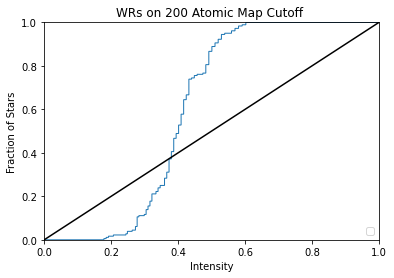

In [132]:
y = x
plt.hist(indeces_percentile_WR_200 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True)
plt.plot(x,y,'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('WRs on 200 Atomic Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

In [133]:
filter_p3 = []

# go through each pixel in p4
for element in p3:
# if the pixel is higher than 0.15, set the value to True, otherwise False:
  if element > 200:
    filter_p3.append(True)
  else:
    filter_p3.append(False)

newp3 = p3[filter_p3]

print(filter_p3)
print(newp3)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [134]:
_RSG_200 = np.array(newp3) #RSG pixels
arr_RSG_200 = np.sort(_RSG_200)
print(arr_RSG_200, len(arr_RSG_200), arr_RSG_200.max())

[ 200.22326873  200.65693465  200.71393187 ... 1163.93204889 1213.03293514
 1225.69363754] 4163 1225.6936375385849


In [135]:
indeces_RSG_200 =[]

for object in arr_RSG_200:
    indeces_RSG_200.append(np.where(atomic_arr==object)[0][0])
print(indeces_RSG_200, len(indeces_RSG_200))

[1137, 438, 577, 577, 862, 1209, 318, 690, 738, 656, 651, 693, 453, 534, 737, 297, 540, 568, 642, 418, 790, 621, 317, 436, 695, 726, 860, 598, 601, 670, 293, 448, 666, 637, 590, 260, 856, 697, 428, 860, 786, 379, 707, 544, 250, 545, 531, 537, 428, 656, 226, 638, 540, 644, 569, 863, 696, 566, 728, 856, 633, 516, 588, 597, 698, 749, 572, 594, 639, 843, 456, 265, 430, 451, 529, 575, 411, 291, 1110, 425, 433, 339, 655, 592, 653, 625, 942, 1301, 778, 423, 480, 793, 449, 469, 947, 838, 641, 653, 756, 632, 864, 500, 747, 1156, 1084, 650, 567, 1045, 656, 519, 435, 654, 1454, 329, 640, 533, 551, 569, 663, 792, 430, 856, 585, 795, 519, 626, 600, 1297, 562, 250, 1310, 507, 461, 597, 582, 58, 411, 188, 567, 418, 511, 662, 434, 922, 1259, 844, 525, 538, 1424, 653, 534, 772, 636, 598, 1183, 1002, 914, 693, 741, 434, 401, 686, 794, 640, 1203, 771, 207, 434, 573, 271, 1205, 869, 775, 426, 702, 1248, 659, 549, 1039, 858, 653, 508, 1230, 704, 513, 677, 709, 538, 376, 874, 793, 621, 583, 400, 626, 410, 6

In [136]:
indeces_percentile_RSG_200 = []

for index in indeces_RSG_200:
    indeces_percentile_RSG_200.append(index / 1604)
print(indeces_percentile_RSG_200, len(indeces_percentile_RSG_200))

[0.7088528678304239, 0.2730673316708229, 0.35972568578553615, 0.35972568578553615, 0.5374064837905237, 0.7537406483790524, 0.19825436408977556, 0.43017456359102246, 0.4600997506234414, 0.4089775561097257, 0.40586034912718205, 0.4320448877805486, 0.28241895261845384, 0.3329177057356609, 0.45947630922693267, 0.18516209476309228, 0.33665835411471323, 0.3541147132169576, 0.4002493765586035, 0.26059850374064836, 0.4925187032418953, 0.3871571072319202, 0.19763092269326682, 0.2718204488778055, 0.4332917705735661, 0.45261845386533667, 0.5361596009975063, 0.37281795511221943, 0.37468827930174564, 0.4177057356608479, 0.18266832917705736, 0.2793017456359102, 0.415211970074813, 0.39713216957605985, 0.36783042394014964, 0.16209476309226933, 0.5336658354114713, 0.43453865336658354, 0.26683291770573564, 0.5361596009975063, 0.49002493765586036, 0.23628428927680797, 0.4407730673316708, 0.33915211970074816, 0.15586034912718205, 0.3397755610972569, 0.33104738154613467, 0.334788029925187, 0.26683291770573

No handles with labels found to put in legend.


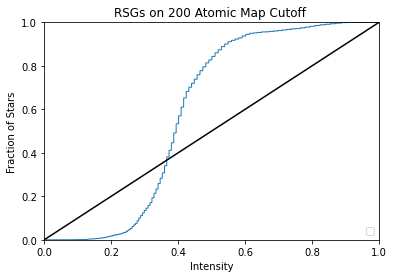

In [137]:
y = x
plt.hist(indeces_percentile_RSG_200 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True)
plt.plot(x,y,'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('RSGs on 200 Atomic Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

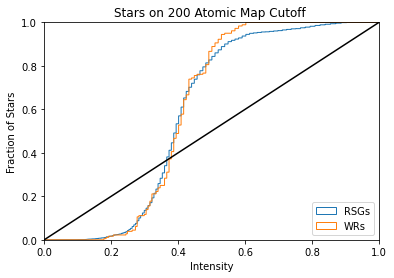

In [138]:
y = x
plt.hist(indeces_percentile_RSG_200 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label = 'RSGs')
plt.hist(indeces_percentile_WR_200 ,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label = 'WRs')
plt.plot(x,y,'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('Stars on 200 Atomic Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

In [156]:
_RSG_unfilt = np.array(p3) #RSG pixels
_RSG_unfilt = _RSG_unfilt[~np.isnan(_RSG_unfilt)]
arr_RSG_unfilt = np.sort(_RSG_unfilt)
print(arr_RSG_unfilt, len(arr_RSG_unfilt), arr_RSG_unfilt.max())

[  26.0612881    30.69983384   32.61202633 ... 1163.93204889 1213.03293514
 1225.69363754] 4802 1225.6936375385849


In [157]:
filename8 = get_pkg_data_filename('atomic.fits')
hdu8 = fits.open(filename)[0]
atomic_arr_un = hdu8.data
y = atomic_arr_un[~np.isnan(atomic_arr_un)]
atomic_arr_unfilt = np.sort(y)
print(atomic_arr_unfilt, len(atomic_arr_unfilt))

[  -3.20402104   -2.89138564   -1.83018965 ... 1245.86138607 1247.32097063
 1250.31864052] 965943


In [144]:
atomic_arr_unfilt.shape

(1604, 1256)

In [158]:
indeces_RSG_unfilt =[]

for object in arr_RSG_unfilt:
    indeces_RSG_unfilt.append(np.where(atomic_arr_unfilt==object)[0][0])
print(indeces_RSG_unfilt, len(indeces_RSG_unfilt))

[328, 694, 952, 2298, 3054, 3497, 4843, 5711, 7503, 7699, 8129, 8420, 8733, 9455, 9492, 13565, 13715, 13926, 14281, 14337, 16230, 17003, 17620, 18385, 19263, 19753, 20079, 20126, 20415, 20934, 21674, 22142, 22415, 22519, 22652, 22763, 23263, 24443, 24508, 25589, 26248, 27286, 27962, 28059, 28675, 28844, 30121, 30515, 31069, 31298, 31878, 33404, 35055, 35267, 35557, 36548, 36676, 36903, 37209, 37768, 38731, 38955, 39353, 39619, 40253, 40550, 42347, 42459, 43073, 43498, 44733, 46120, 46618, 46813, 47069, 47542, 48029, 48134, 48538, 49310, 49381, 51697, 52209, 52592, 53063, 54439, 54505, 54836, 55110, 55303, 55753, 55887, 56109, 57044, 57764, 58569, 58882, 58953, 59808, 62734, 64386, 64531, 65943, 66892, 66981, 67263, 68092, 68135, 68151, 68261, 68555, 69382, 69447, 69791, 70530, 70536, 71070, 71428, 71525, 72275, 72276, 72641, 73018, 73543, 74011, 74148, 74154, 74613, 74791, 75248, 75406, 76717, 76894, 77043, 77079, 77431, 78162, 78261, 78534, 79808, 81032, 81225, 81277, 81432, 81673, 81

In [159]:
indeces_percentile_RSG_unfilt = []

for index in indeces_RSG_unfilt:
    indeces_percentile_RSG_unfilt.append(index / 965943)
print(indeces_percentile_RSG_unfilt, len(indeces_percentile_RSG_unfilt))

[0.00033956454987509613, 0.000718468895162551, 0.0009855654008569864, 0.002379022364673692, 0.0031616772418248283, 0.0036202964357110097, 0.005013753399527716, 0.005912357147367909, 0.007767539078392825, 0.007970449602098674, 0.008415610444922733, 0.00871687045715948, 0.009040906140424436, 0.00978836225325925, 0.0098266667908976, 0.014043271704438047, 0.014198560370539463, 0.014416999760855455, 0.014784516270628805, 0.014842490705973333, 0.016802233672173202, 0.0176024879314825, 0.018241241978046323, 0.019033214175163547, 0.019942170500743834, 0.02044944681000846, 0.020786940844335536, 0.02083559795971398, 0.021134787456402706, 0.021672086241113605, 0.02243817699388059, 0.02292267763211701, 0.023205303004421585, 0.02331296981291857, 0.023450659096861823, 0.023565572709776873, 0.02408320159678159, 0.02530480577011273, 0.025372097525423343, 0.026491211179127547, 0.027173446052199766, 0.028248043621621567, 0.028947877876851946, 0.029048297880930864, 0.029686016669720677, 0.029860975233528

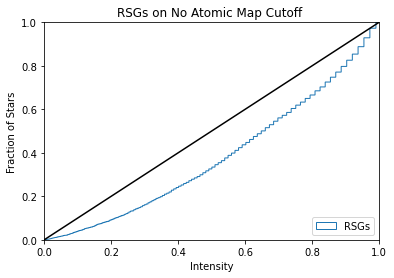

In [172]:
plt.hist(indeces_percentile_RSG_unfilt,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label = 'RSGs')
plt.plot(x,y,'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('RSGs on No Atomic Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

In [166]:
_WR_unfilt = np.array(p) #WR pixels
_WR_unfilt = _WR_unfilt[~np.isnan(_WR_unfilt)]
arr_WR_unfilt = np.sort(_WR_unfilt)
print(arr_WR_unfilt, len(arr_WR_unfilt), arr_WR_unfilt.max())

[  94.71169946   98.02096976  107.94318545  114.18167688  120.86211186
  142.11370395  144.42211691  159.76420869  165.1929768   166.86290387
  173.6007332   176.10024573  183.62876458  193.67870459  195.30770714
  201.86032007  206.12547255  207.03669398  211.9901038   217.70990721
  224.45260222  225.68021241  227.58368752  229.83453904  231.9705514
  233.59259286  237.41140136  239.61641584  247.52279696  248.34964163
  251.67048559  259.60568176  260.91056764  261.77911383  264.94737847
  267.88893764  273.36786403  274.18073236  277.36580236  277.65103266
  278.86630984  282.26306458  284.11661441  289.90766757  295.3440443
  295.50924438  300.63131248  304.14187787  304.1886433   305.4352157
  305.56038898  308.10779895  308.95344572  312.47256319  312.7411503
  314.43110891  314.91077056  317.7156686   321.13119375  321.27217397
  326.63304067  329.93868677  331.54704626  335.66682131  338.57194236
  338.75570181  338.8865936   341.65667051  347.63608631  350.62566452
  351.1719

In [167]:
indeces_WR_unfilt =[]

for object in arr_WR_unfilt:
    indeces_WR_unfilt.append(np.where(atomic_arr_unfilt==object)[0][0])
print(indeces_WR_unfilt, len(indeces_WR_unfilt))

[59961, 65209, 81985, 93147, 106042, 149126, 153827, 184339, 194876, 198060, 210658, 215219, 228773, 246704, 249536, 261351, 269135, 270759, 280147, 290409, 302923, 305249, 308749, 312850, 316768, 319668, 326753, 330875, 345709, 347241, 353557, 368898, 371457, 373258, 379471, 385321, 396361, 397976, 404168, 404738, 407199, 413929, 417862, 429572, 440444, 440737, 450931, 457902, 457998, 460470, 460766, 465838, 467481, 474545, 475098, 478548, 479443, 485080, 491985, 492294, 503166, 509670, 512878, 520959, 526710, 527068, 527326, 532836, 544428, 550170, 551169, 552987, 554530, 557236, 563292, 566699, 574711, 577893, 580698, 586378, 586960, 588146, 589791, 605324, 605863, 625688, 627498, 642863, 643853, 655815, 658027, 662851, 663942, 668066, 668120, 670670, 670891, 672050, 677634, 678895, 696716, 700149, 702038, 702268, 704291, 707108, 720809, 721985, 729075, 735968, 736320, 737413, 748356, 753112, 759333, 769665, 770704, 774263, 787507, 794959, 795130, 797179, 806926, 812556, 816603, 829

In [168]:
indeces_percentile_WR_unfilt = []

for index in indeces_WR_unfilt:
    indeces_percentile_WR_unfilt.append(index / 965943)
print(indeces_percentile_WR_unfilt, len(indeces_percentile_WR_unfilt))

[0.06207509138738, 0.06750812418538153, 0.0848756086021639, 0.09643115587565726, 0.10978080487150899, 0.15438385080693168, 0.15925059760255006, 0.19083838280312607, 0.20174689396786352, 0.2050431547203096, 0.21808533215728051, 0.22280714286453757, 0.2368390267334615, 0.2554022338792248, 0.2583340838952195, 0.27056565449514103, 0.2786241010080305, 0.28030535963302183, 0.29002435961542244, 0.30064817489230733, 0.3136033906762614, 0.3160114002586074, 0.3196348024676404, 0.32388039459885315, 0.3279365345574221, 0.3309387821020495, 0.33827358343090635, 0.3425409159753733, 0.3578979297950293, 0.35948394470481176, 0.3660226328054554, 0.3819045223165342, 0.3845537469602244, 0.38641824621121534, 0.392850302761136, 0.39890656073909125, 0.4103358065641554, 0.4120077478691807, 0.41841806400584713, 0.4190081609370325, 0.42155593031886973, 0.4285232151379533, 0.4325948839631324, 0.4447177524967829, 0.4559730750158136, 0.45627640554359833, 0.4668298232918506, 0.47404660523447034, 0.4741459899807753, 

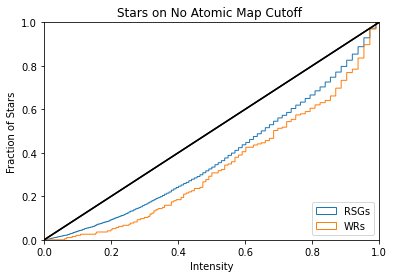

In [169]:
y = x
plt.hist(indeces_percentile_RSG_unfilt,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label = 'RSGs')
plt.hist(indeces_percentile_WR_unfilt,bins=np.logspace(-4,4,1000), zorder=2,histtype='step', cumulative=True, density=True, label = 'WRs')
plt.plot(x,y,'black')
plt.plot(x,y,'black')
plt.xlabel('Intensity')
plt.ylabel('Fraction of Stars')
plt.title('Stars on No Atomic Map Cutoff ')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'lower right')

In [177]:
hdu2.header

SIMPLE  =                    T         /                                        
BITPIX  =                  -32         /                                        
NAXIS   =                    4         /                                        
NAXIS1  =                  777         /                                        
NAXIS2  =                 1251         /                                        
NAXIS3  =                    1         /                                        
NAXIS4  =                    1         /                                        
DATAMIN = -0.3150268745422E+02         /                                        
DATAMAX =  0.1603829193115E+02         /                                        
BUNIT   = 'K (Ta*)     '               /                                        
CTYPE1  = 'RA---GLS    '               /                                        
CRVAL1  =  0.2346208333333E+02         /                                        
CDELT1  = -0.8333333129820E-